# Hotel Cancellation Prediction

# Project Description:

# Part 1: data Exploration and Pre-processing

# 1) load the given dataset 

In [226]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report,accuracy_score, roc_curve,roc_auc_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [228]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [229]:
data=pd.read_csv(r"E:\GANESH\ML\Hotel Cancellation Prediction\EXCEL - Random Forest Hotel Cancellation Prediction Analysis.csv")

In [230]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


# 2) Print the unique values in all columns

In [231]:
data.columns.unique()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [232]:
# Let's Check The Unique Values In All The Columns Of The Data...

In [233]:
for i in data.columns:
    print("The Column Is : ", i, data[i].unique())

The Column Is :  hotel ['Resort Hotel' 'City Hotel']
The Column Is :  is_canceled [0 1]
The Column Is :  lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 

# 3) Fill nan value with ‘other’

In [234]:
# Replace NaN values with ‘other’ to keep your dataset clean and ready for models

In [235]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [236]:
data["country"].isna().sum()

488

In [237]:
data["country"] = data["country"].fillna("Other")

In [238]:
data["country"].isna().sum()

0

In [239]:
# So The 'na' Data From The Country Column Is Successfully Replaced With "other"...

In [240]:
data["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [241]:
(data["country"] == "Other").sum()             
# Here We Count The Total Number Of 'NaN' Is Now Replaced With "Other".

488

# 4) Fill nan in agent with mean of agent columns


In [242]:
data["agent"].isna().sum()

16340

In [243]:
# Then We Have Total '16340' Rows In Data Where The 'agent' Value Is Null (NaN)....

In [244]:
# Let's Fill The Value Of It With Its Mean...

In [245]:
data["agent"] = data["agent"].fillna(data["agent"].mean())

In [246]:
data["agent"].isna().sum()

0

In [247]:
data["agent"].mean()

86.69338185346918

In [248]:
data["agent"].unique()

array([ 86.69338185, 304.        , 240.        , 303.        ,
        15.        , 241.        ,   8.        , 250.        ,
       115.        ,   5.        , 175.        , 134.        ,
       156.        , 243.        , 242.        ,   3.        ,
       105.        ,  40.        , 147.        , 306.        ,
       184.        ,  96.        ,   2.        , 127.        ,
        95.        , 146.        ,   9.        , 177.        ,
         6.        , 143.        , 244.        , 149.        ,
       167.        , 300.        , 171.        , 305.        ,
        67.        , 196.        , 152.        , 142.        ,
       261.        , 104.        ,  36.        ,  26.        ,
        29.        , 258.        , 110.        ,  71.        ,
       181.        ,  88.        , 251.        , 275.        ,
        69.        , 248.        , 208.        , 256.        ,
       314.        , 126.        , 281.        , 273.        ,
       253.        , 185.        , 330.        , 334.  

In [249]:
(data["agent"] == 86.69338185).sum()

0

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [251]:
# Above Due To Float Precision Comparing Issue It Returns Me 0 Even The Number Is Present In It....

In [252]:
# Then We Can Do Following...

In [253]:
np.isclose(data["agent"], 86.69338185).sum()

16340

In [254]:
# So Basically In The Place Of a NaN We Successfully Set/Provide The (Mean) Value Of The "agent" Column...

In [255]:
# Another Method Of The Replacement Is Like Following...

In [256]:
# Try To Replacing The Value With The '0' But Not Works Then We Do Following...

#    data["agent"].replace(86.69338185, 0, inplace=True)

In [257]:
# Below Two Cells Are Important When We Want To Replace Some Data With Another When We Have Float Precision Fault In Our Data....

In [258]:
mask = np.isclose(data["agent"], 86.69338185)

In [259]:
data.loc[mask, "agent"] = 0

In [260]:
np.isclose(86.69338185, data["agent"]).sum()

0

In [261]:
# So The Data Is successfully Replaced And Count Will Be Done Then Now We See The Second Trick To Replace "NaN" With The Mean Value...

In [262]:
# Trick 2:

In [263]:
data["agent"].isna().sum()

0

In [264]:
data["agent"].replace(np.nan, data["agent"].mean(), inplace = True)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_6532\283316777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["agent"].replace(np.nan, data["agent"].mean(), inplace = True)


In [265]:
data["agent"].isna().sum()

0

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [267]:
# So The "NaN" Data Is Successfully Replaced With Its Mean Value Using The "replace" Method...

# 5) Drop all the remaining null values

In [268]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [269]:
data.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,0.0,110.0,0,Transient,107.42,0,0,Check-Out,02/07/2015
218,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,0.0,110.0,0,Transient,104.72,0,1,Canceled,08/07/2015
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,0.0,110.0,0,Transient,104.72,0,1,Canceled,08/07/2015
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,...,No Deposit,0.0,110.0,0,Transient,104.72,1,1,Check-Out,10/07/2015
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,...,No Deposit,0.0,113.0,0,Transient,100.00,1,0,Check-Out,13/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,City Hotel,0,40,2017,August,35,29,0,1,1,...,No Deposit,0.0,451.0,0,Transient,95.00,0,0,Check-Out,30/08/2017
119122,City Hotel,0,40,2017,August,35,29,0,1,1,...,No Deposit,0.0,451.0,0,Transient,95.00,0,0,Check-Out,30/08/2017
119123,City Hotel,0,40,2017,August,35,29,0,1,1,...,No Deposit,0.0,451.0,0,Transient,95.00,0,0,Check-Out,30/08/2017
119124,City Hotel,0,0,2017,August,35,29,0,1,1,...,No Deposit,0.0,72.0,0,Transient,0.00,0,2,Check-Out,30/08/2017


In [270]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [271]:
data.dropna(inplace=True)

In [272]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   object 
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   object 
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

In [274]:
# All The Null Values Are Either Filled With Some Data And The Rest Of Them Are Successfully Dropped From Actual Data...

# 6) Plot the count of adult and children with help of a bar plot

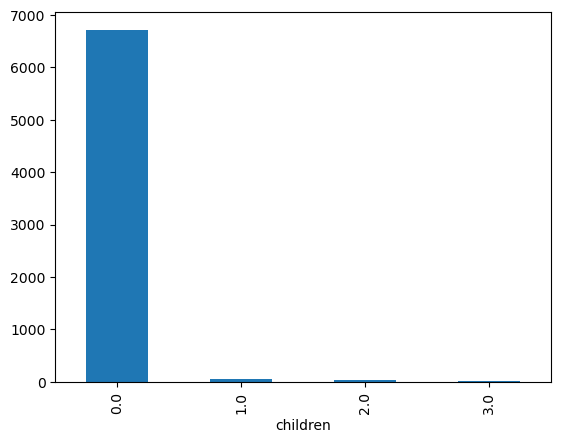

In [275]:
# First We Plot The Bar For The Childrens Like... 

data["children"].value_counts().plot(kind = "bar");

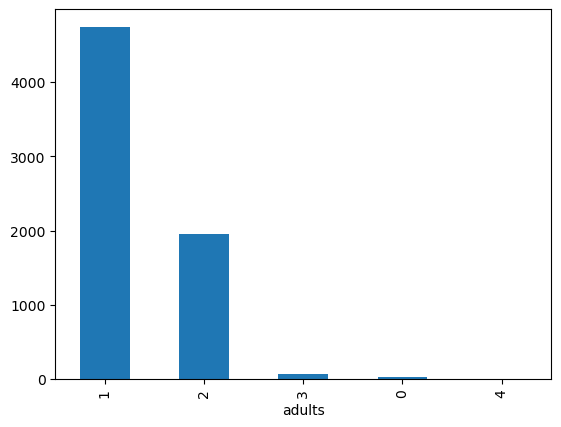

In [276]:
# Then We Also Do For The Adults...

data["adults"].value_counts().plot(kind = "bar");

# 7) Perform Label encoding on categorical columns

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   object 
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   object 
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

In [278]:
# There Are Total 12 Columns Then One By One We Can Encode All Of Them....

In [279]:
from sklearn.preprocessing import LabelEncoder

In [280]:
enc = LabelEncoder()

In [281]:
# Let's See How We Can Encode The Column Data One By One...

data["hotel"] = enc.fit_transform(data["hotel"])

In [282]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,1,0,0,2015,July,27,1,0,1,2,...,No Deposit,0.0,110.0,0,Transient,107.42,0,0,Check-Out,02/07/2015
218,1,1,1,2015,July,28,8,0,1,2,...,No Deposit,0.0,110.0,0,Transient,104.72,0,1,Canceled,08/07/2015
219,1,1,1,2015,July,28,8,0,1,2,...,No Deposit,0.0,110.0,0,Transient,104.72,0,1,Canceled,08/07/2015
220,1,0,1,2015,July,28,8,0,2,2,...,No Deposit,0.0,110.0,0,Transient,104.72,1,1,Check-Out,10/07/2015
295,1,0,84,2015,July,28,11,1,1,2,...,No Deposit,0.0,113.0,0,Transient,100.00,1,0,Check-Out,13/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,August,35,29,0,1,1,...,No Deposit,0.0,451.0,0,Transient,95.00,0,0,Check-Out,30/08/2017
119122,0,0,40,2017,August,35,29,0,1,1,...,No Deposit,0.0,451.0,0,Transient,95.00,0,0,Check-Out,30/08/2017
119123,0,0,40,2017,August,35,29,0,1,1,...,No Deposit,0.0,451.0,0,Transient,95.00,0,0,Check-Out,30/08/2017
119124,0,0,0,2017,August,35,29,0,1,1,...,No Deposit,0.0,72.0,0,Transient,0.00,0,2,Check-Out,30/08/2017


In [283]:
enc.classes_

array(['City Hotel', 'Resort Hotel'], dtype=object)

In [284]:
# Here We Can See The CLasses After The Encoding Of One Column....

In [285]:
# The Date Can't Transformed Into Encoded Formate....

In [286]:

data["meal"]=enc.fit_transform(data["meal"])

data["country"] = enc.fit_transform(data["country"])

data["market_segment"] = enc.fit_transform(data["market_segment"])

data["distribution_channel"] = enc.fit_transform(data["distribution_channel"])

data["reserved_room_type"] = enc.fit_transform(data["reserved_room_type"])

data["assigned_room_type"] = enc.fit_transform(data["assigned_room_type"])

data["deposit_type"] = enc.fit_transform(data["deposit_type"])

data["customer_type"] = enc.fit_transform(data["customer_type"])

data["reservation_status"] = enc.fit_transform(data["reservation_status"])


In [287]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,1,0,0,2015,July,27,1,0,1,2,...,0,0.0,110.0,0,2,107.42,0,0,1,02/07/2015
218,1,1,1,2015,July,28,8,0,1,2,...,0,0.0,110.0,0,2,104.72,0,1,0,08/07/2015
219,1,1,1,2015,July,28,8,0,1,2,...,0,0.0,110.0,0,2,104.72,0,1,0,08/07/2015
220,1,0,1,2015,July,28,8,0,2,2,...,0,0.0,110.0,0,2,104.72,1,1,1,10/07/2015
295,1,0,84,2015,July,28,11,1,1,2,...,0,0.0,113.0,0,2,100.00,1,0,1,13/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,August,35,29,0,1,1,...,0,0.0,451.0,0,2,95.00,0,0,1,30/08/2017
119122,0,0,40,2017,August,35,29,0,1,1,...,0,0.0,451.0,0,2,95.00,0,0,1,30/08/2017
119123,0,0,40,2017,August,35,29,0,1,1,...,0,0.0,451.0,0,2,95.00,0,0,1,30/08/2017
119124,0,0,0,2017,August,35,29,0,1,1,...,0,0.0,72.0,0,2,0.00,0,2,1,30/08/2017


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   int32  
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   object 
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

In [289]:
# Only The Date Field Is Left And The Rest Of The Category Data Are Successfully Transformed....

In [290]:
# Here While Conversion We Specify The Format = "%B" Means We Have The Full Month Names...
 
data["arrival_date_month"] = pd.to_datetime(data["arrival_date_month"], format = "%B").dt.month

In [291]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,1,0,0,2015,7,27,1,0,1,2,...,0,0.0,110.0,0,2,107.42,0,0,1,02/07/2015
218,1,1,1,2015,7,28,8,0,1,2,...,0,0.0,110.0,0,2,104.72,0,1,0,08/07/2015
219,1,1,1,2015,7,28,8,0,1,2,...,0,0.0,110.0,0,2,104.72,0,1,0,08/07/2015
220,1,0,1,2015,7,28,8,0,2,2,...,0,0.0,110.0,0,2,104.72,1,1,1,10/07/2015
295,1,0,84,2015,7,28,11,1,1,2,...,0,0.0,113.0,0,2,100.00,1,0,1,13/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,8,35,29,0,1,1,...,0,0.0,451.0,0,2,95.00,0,0,1,30/08/2017
119122,0,0,40,2017,8,35,29,0,1,1,...,0,0.0,451.0,0,2,95.00,0,0,1,30/08/2017
119123,0,0,40,2017,8,35,29,0,1,1,...,0,0.0,451.0,0,2,95.00,0,0,1,30/08/2017
119124,0,0,0,2017,8,35,29,0,1,1,...,0,0.0,72.0,0,2,0.00,0,2,1,30/08/2017


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   int32  
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   int32  
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

In [293]:
data["rev_date"] = data["reservation_status_date"]

In [294]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,rev_date
18,1,0,0,2015,7,27,1,0,1,2,...,0.0,110.0,0,2,107.42,0,0,1,02/07/2015,02/07/2015
218,1,1,1,2015,7,28,8,0,1,2,...,0.0,110.0,0,2,104.72,0,1,0,08/07/2015,08/07/2015
219,1,1,1,2015,7,28,8,0,1,2,...,0.0,110.0,0,2,104.72,0,1,0,08/07/2015,08/07/2015
220,1,0,1,2015,7,28,8,0,2,2,...,0.0,110.0,0,2,104.72,1,1,1,10/07/2015,10/07/2015
295,1,0,84,2015,7,28,11,1,1,2,...,0.0,113.0,0,2,100.00,1,0,1,13/07/2015,13/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,30/08/2017,30/08/2017
119122,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,30/08/2017,30/08/2017
119123,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,30/08/2017,30/08/2017
119124,0,0,0,2017,8,35,29,0,1,1,...,0.0,72.0,0,2,0.00,0,2,1,30/08/2017,30/08/2017


In [295]:
enc.classes_

array(['Canceled', 'Check-Out', 'No-Show'], dtype=object)

In [296]:
data["rev_date"]=enc.fit_transform(data["rev_date"])

In [297]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,rev_date
18,1,0,0,2015,7,27,1,0,1,2,...,0.0,110.0,0,2,107.42,0,0,1,02/07/2015,32
218,1,1,1,2015,7,28,8,0,1,2,...,0.0,110.0,0,2,104.72,0,1,0,08/07/2015,172
219,1,1,1,2015,7,28,8,0,1,2,...,0.0,110.0,0,2,104.72,0,1,0,08/07/2015,172
220,1,0,1,2015,7,28,8,0,2,2,...,0.0,110.0,0,2,104.72,1,1,1,10/07/2015,221
295,1,0,84,2015,7,28,11,1,1,2,...,0.0,113.0,0,2,100.00,1,0,1,13/07/2015,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,30/08/2017,687
119122,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,30/08/2017,687
119123,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,30/08/2017,687
119124,0,0,0,2017,8,35,29,0,1,1,...,0.0,72.0,0,2,0.00,0,2,1,30/08/2017,687


In [298]:
# For The Date Column We Have To Seprate Them...

In [299]:
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"], format = "%d/%m/%Y")

In [300]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,rev_date
18,1,0,0,2015,7,27,1,0,1,2,...,0.0,110.0,0,2,107.42,0,0,1,2015-07-02,32
218,1,1,1,2015,7,28,8,0,1,2,...,0.0,110.0,0,2,104.72,0,1,0,2015-07-08,172
219,1,1,1,2015,7,28,8,0,1,2,...,0.0,110.0,0,2,104.72,0,1,0,2015-07-08,172
220,1,0,1,2015,7,28,8,0,2,2,...,0.0,110.0,0,2,104.72,1,1,1,2015-07-10,221
295,1,0,84,2015,7,28,11,1,1,2,...,0.0,113.0,0,2,100.00,1,0,1,2015-07-13,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,2017-08-30,687
119122,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,2017-08-30,687
119123,0,0,40,2017,8,35,29,0,1,1,...,0.0,451.0,0,2,95.00,0,0,1,2017-08-30,687
119124,0,0,0,2017,8,35,29,0,1,1,...,0.0,72.0,0,2,0.00,0,2,1,2017-08-30,687


In [301]:

data["reservation_date"] = data["reservation_status_date"].dt.day

data["reservation_month"] = data["reservation_status_date"].dt.month

data["reservation_year"] = data["reservation_status_date"].dt.year


In [302]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,rev_date,reservation_date,reservation_month,reservation_year
18,1,0,0,2015,7,27,1,0,1,2,...,2,107.42,0,0,1,2015-07-02,32,2,7,2015
218,1,1,1,2015,7,28,8,0,1,2,...,2,104.72,0,1,0,2015-07-08,172,8,7,2015
219,1,1,1,2015,7,28,8,0,1,2,...,2,104.72,0,1,0,2015-07-08,172,8,7,2015
220,1,0,1,2015,7,28,8,0,2,2,...,2,104.72,1,1,1,2015-07-10,221,10,7,2015
295,1,0,84,2015,7,28,11,1,1,2,...,2,100.00,1,0,1,2015-07-13,289,13,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,8,35,29,0,1,1,...,2,95.00,0,0,1,2017-08-30,687,30,8,2017
119122,0,0,40,2017,8,35,29,0,1,1,...,2,95.00,0,0,1,2017-08-30,687,30,8,2017
119123,0,0,40,2017,8,35,29,0,1,1,...,2,95.00,0,0,1,2017-08-30,687,30,8,2017
119124,0,0,0,2017,8,35,29,0,1,1,...,2,0.00,0,2,1,2017-08-30,687,30,8,2017


In [303]:
data.drop(["reservation_status_date", "rev_date"], axis = 1, inplace = True)

In [304]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_date,reservation_month,reservation_year
18,1,0,0,2015,7,27,1,0,1,2,...,110.0,0,2,107.42,0,0,1,2,7,2015
218,1,1,1,2015,7,28,8,0,1,2,...,110.0,0,2,104.72,0,1,0,8,7,2015
219,1,1,1,2015,7,28,8,0,1,2,...,110.0,0,2,104.72,0,1,0,8,7,2015
220,1,0,1,2015,7,28,8,0,2,2,...,110.0,0,2,104.72,1,1,1,10,7,2015
295,1,0,84,2015,7,28,11,1,1,2,...,113.0,0,2,100.00,1,0,1,13,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,0,40,2017,8,35,29,0,1,1,...,451.0,0,2,95.00,0,0,1,30,8,2017
119122,0,0,40,2017,8,35,29,0,1,1,...,451.0,0,2,95.00,0,0,1,30,8,2017
119123,0,0,40,2017,8,35,29,0,1,1,...,451.0,0,2,95.00,0,0,1,30,8,2017
119124,0,0,0,2017,8,35,29,0,1,1,...,72.0,0,2,0.00,0,2,1,30,8,2017


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   int32  
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   int32  
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

# Part 2:  Model Building

# 1. Create features and target data

In [306]:
# Split your dataset into features (input variables) and target (output variable) for model training.

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   int32  
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   int32  
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

In [308]:
# Then 'is_cancelled' Is The Target Data And Rest Of The Data Are Called As "Featured Data"....

In [309]:
x=data.drop("is_canceled",axis=1)

In [310]:
y=data["is_canceled"]

In [311]:
y

18        0
218       1
219       1
220       0
295       0
         ..
119119    0
119122    0
119123    0
119124    0
119248    0
Name: is_canceled, Length: 6797, dtype: int64

In [312]:
x

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_date,reservation_month,reservation_year
18,1,0,2015,7,27,1,0,1,2,0.0,...,110.0,0,2,107.42,0,0,1,2,7,2015
218,1,1,2015,7,28,8,0,1,2,0.0,...,110.0,0,2,104.72,0,1,0,8,7,2015
219,1,1,2015,7,28,8,0,1,2,0.0,...,110.0,0,2,104.72,0,1,0,8,7,2015
220,1,1,2015,7,28,8,0,2,2,0.0,...,110.0,0,2,104.72,1,1,1,10,7,2015
295,1,84,2015,7,28,11,1,1,2,0.0,...,113.0,0,2,100.00,1,0,1,13,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119119,0,40,2017,8,35,29,0,1,1,0.0,...,451.0,0,2,95.00,0,0,1,30,8,2017
119122,0,40,2017,8,35,29,0,1,1,0.0,...,451.0,0,2,95.00,0,0,1,30,8,2017
119123,0,40,2017,8,35,29,0,1,1,0.0,...,451.0,0,2,95.00,0,0,1,30,8,2017
119124,0,0,2017,8,35,29,0,1,1,0.0,...,72.0,0,2,0.00,0,2,1,30,8,2017


# 2. Split into training & testing

In [313]:
# Divide your dataset into training and testing sets to evaluate your model's performance.

In [314]:
from sklearn.model_selection import train_test_split

In [315]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, random_state = 40)

In [316]:
x_test.shape

(2719, 33)

In [317]:
x_train.shape

(4078, 33)

# 3. Apply Random forest classifier on data

In [318]:
from sklearn.ensemble import RandomForestClassifier 

In [319]:
# Here We Can define The "n_estimators" Which Is By Default 100, Then The Number Of Branches Are Increases One By One...
# Here Increasing The "n_estimators" It Increases Number Of Trees But Increases Number Of Computation Time Due To More Number Of Trees...

#    model = RandomForestClassifier(n_estimators = 700, verbose = 3, max_depth = 3)

#    model = RandomForestClassifier(n_estimators = 400, verbose = 6, random_state = 20, min_samples_leaf = 5)

# NOTE :- 'max_depth' Means What Is The Maximum Depth Should Be Created....
# NOTE :- 'min_samples_leaf' Means Helps In Overfitting Condition...
# NOTE :- 'verbose' Gives You The Training Data Info Like '2' Is More Enough For That... Prints The Info. While Running Algorithm...
# NOTE :- 'n_jobs' Means The CPU-Cores To Be Used While Processing... '1' For Default And '-1' For All Avail. CPU-Cores...

model = RandomForestClassifier(n_estimators = 400, verbose = 9, random_state = 40)

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6797 entries, 18 to 119248
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6797 non-null   int32  
 1   is_canceled                     6797 non-null   int64  
 2   lead_time                       6797 non-null   int64  
 3   arrival_date_year               6797 non-null   int64  
 4   arrival_date_month              6797 non-null   int32  
 5   arrival_date_week_number        6797 non-null   int64  
 6   arrival_date_day_of_month       6797 non-null   int64  
 7   stays_in_weekend_nights         6797 non-null   int64  
 8   stays_in_week_nights            6797 non-null   int64  
 9   adults                          6797 non-null   int64  
 10  children                        6797 non-null   float64
 11  babies                          6797 non-null   int64  
 12  meal                            6797

In [321]:
model.fit(x_train, y_train)

building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.1s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400
building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.7s


building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
b

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.9s


building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.1s


building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400


[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    1.3s


building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.6s


building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400


[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    1.8s


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    2.1s


RandomForestClassifier(n_estimators=400, random_state=40, verbose=9)

In [322]:
model.score(x_train,y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.2s


1.0

In [323]:
model.score(x_test,y_test)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


0.9930121368150056

# 4. Create function which show Precision score, recall score, accuracy, classification report and confusion matrix

In [324]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

In [325]:
confusion_matrix(y_train, model.predict(x_train))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.2s


array([[3394,    0],
       [   0,  684]], dtype=int64)

In [326]:
print(classification_report(y_test, model.predict(x_test)))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2212
           1       1.00      0.96      0.98       507

    accuracy                           0.99      2719
   macro avg       1.00      0.98      0.99      2719
weighted avg       0.99      0.99      0.99      2719



[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


<Axes: >

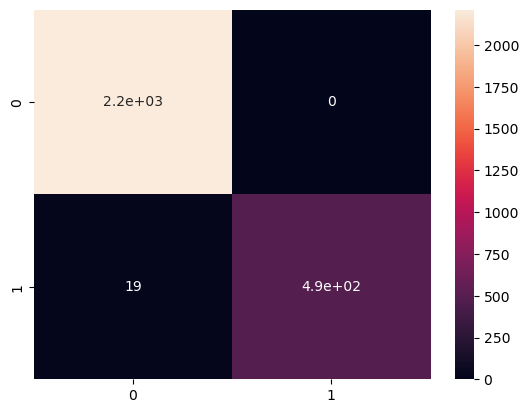

In [327]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot = True)

In [328]:
precision_score(y_test, model.predict(x_test))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


1.0

In [329]:
recall_score(y_test, model.predict(x_test))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


0.9625246548323472

In [330]:
accuracy_score(y_test, model.predict(x_test))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


0.9930121368150056

In [331]:
def print_all_data(model, x_train, x_test, y_train, y_test):
    print(classification_report(y_test, model.predict(x_test)))
    confusion_matrix(y_test, model.predict(x_test))
    print("\n", "The Accuracy Score Is : ", accuracy_score(y_test, model.predict(x_test)))
    print("\n", "The Precision Score Is : ", precision_score(y_test, model.predict(x_test)))
    print("\n", "The Recall Score Is : ", recall_score(y_test, model.predict(x_test)))

In [332]:
print_all_data(model, x_train, x_test, y_train, y_test)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2212
           1       1.00      0.96      0.98       507

    accuracy                           0.99      2719
   macro avg       1.00      0.98      0.99      2719
weighted avg       0.99      0.99      0.99      2719



[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do


 The Accuracy Score Is :  0.9930121368150056

 The Precision Score Is :  1.0


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 241 tasks      | elapsed:    0.0s



 The Recall Score Is :  0.9625246548323472


[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 337 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 391 tasks      | elapsed:    0.1s
